In [1]:
import os
os.chdir("../..")
import dotenv


dotenv.load_dotenv(override=True)

print(os.getcwd(), os.getenv("HF_HOME"))

import json
import time
from concurrent.futures import ProcessPoolExecutor, as_completed
from functools import partial
from hashlib import sha256
from pathlib import Path

import datasets
import matplotlib.pyplot as plt
import pandas as pd
import tqdm
from transformers import AutoTokenizer
from datasets import load_dataset

/data1/xhuan192/codes/med-sipf cache/


/data1/xhuan192/misc/miniconda3/envs/m1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
num_tokens_mapping = {}

In [3]:
tokenizer = AutoTokenizer.from_pretrained("simplescaling/s1.1-32B")
ds = load_dataset("simplescaling/s1K-1.1")

def addlen(x):
    x['deepseek_len'] = len(tokenizer(x['deepseek_thinking_trajectory'])['input_ids'])
    return x

ds = ds['train'].map(addlen)
num_tokens_mapping["num_tokens_s1"] = pd.Series(ds['deepseek_len'])  # Replace with actual data

In [4]:
tokenizer = AutoTokenizer.from_pretrained("UCSC-VLAA/m1-32B-1K")
ds = load_dataset("UCSC-VLAA/m23k-tokenized")

def addlen(x):
    x['deepseek_len'] = len(tokenizer(x['reasoning'])['input_ids'])
    return x

ds = ds['train'].map(addlen)
num_tokens_mapping["num_tokens_m23k"] = pd.Series(ds['deepseek_len'])  # Replace with actual data

Map: 100%|██████████| 23493/23493 [01:18<00:00, 298.38 examples/s]


In [5]:
tokenizer = AutoTokenizer.from_pretrained("UCSC-VLAA/m1-32B-1K")
ds = load_dataset("UCSC-VLAA/m1k-tokenized")

def addlen(x):
    x['deepseek_len'] = len(tokenizer(x['reasoning'])['input_ids'])
    return x

ds = ds['train'].map(addlen)
num_tokens_mapping["num_tokens_m1k"] = pd.Series(ds['deepseek_len'])  # Replace with actual data

Map: 100%|██████████| 1000/1000 [00:03<00:00, 263.17 examples/s]


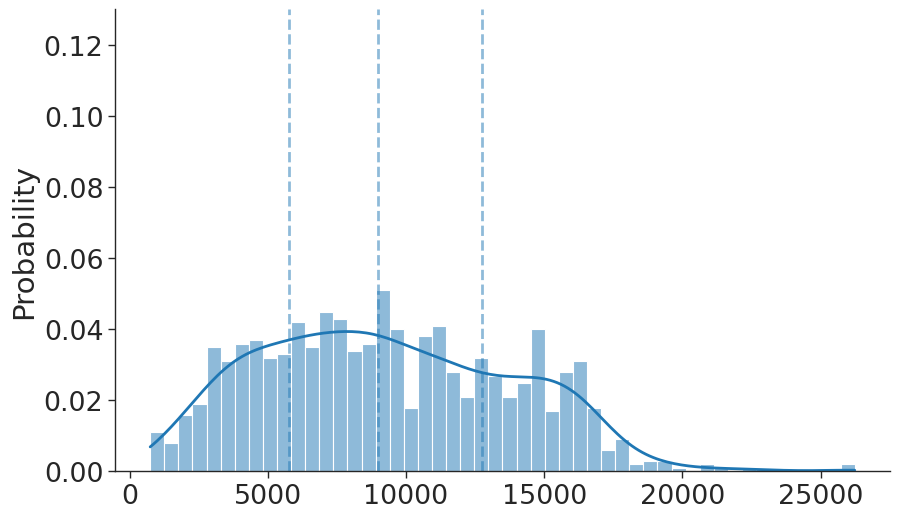

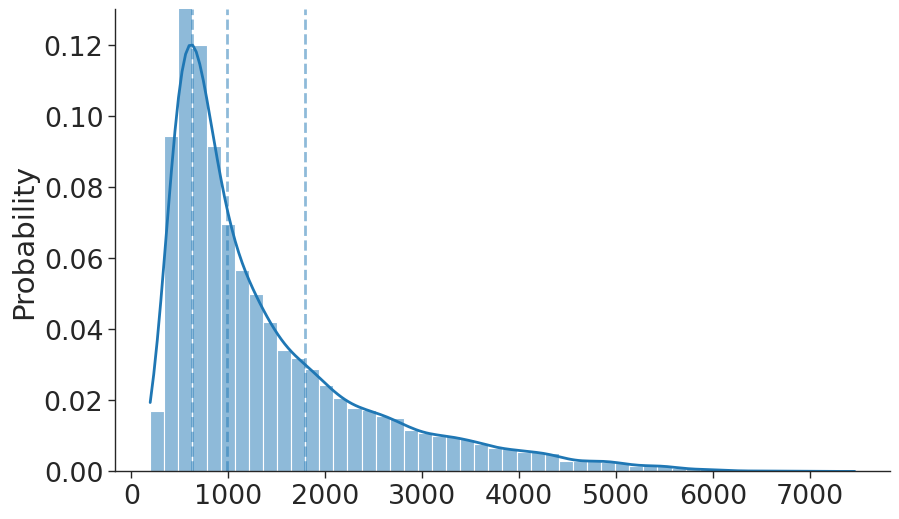

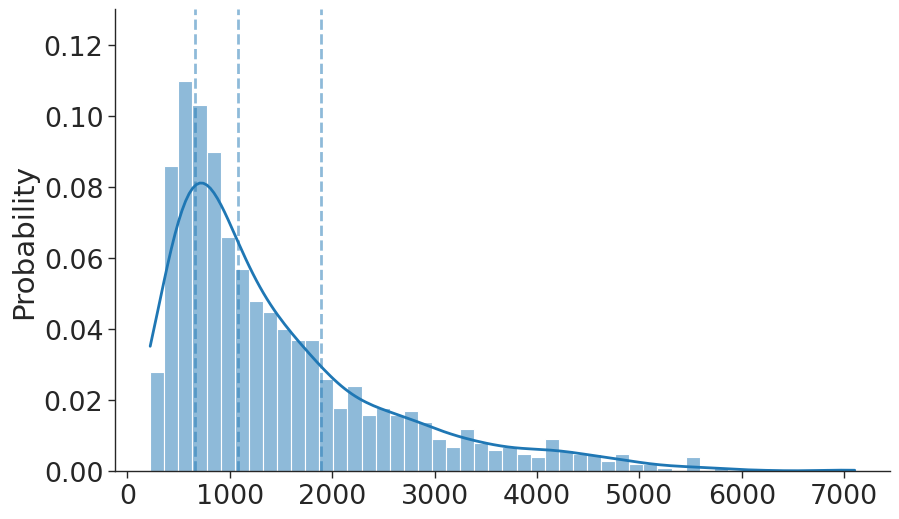

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


plt.rcParams.update({
    'font.family': 'serif',
})

# sns.set_theme()
# Set the style of the visualization
# sns.set_style("white")
sns.set_style("ticks")

# Set the context to "paper" to make the plot suitable for a research paper
sns.set_context("paper", font_scale=2.2, rc={"lines.linewidth": 2})

# Customize the color palette
# sns.set_palette("pastel")

for name, num_tokens_s1 in num_tokens_mapping.items():
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.histplot(num_tokens_s1, bins=50, label='s1', kde=True, ax=ax, stat="probability")
    sns.despine()
    ax.set_ylim(0, 0.13)

    quantiles = ['25%','50%', '75%']
    desc = num_tokens_s1.describe()
    for i in range(len(quantiles)):
        ax.axvline(desc[quantiles[i]], ls='--', alpha=0.5)

    display(fig)
    Path("misc").mkdir(exist_ok=True)
    fig.savefig(f"misc/{name}.pdf", dpi=300, bbox_inches='tight')
    fig.clear()